# Deodorant instant liking

*Data_train_reduced.csv* has survey results of 5 deodorants with several information. I have listed some of the key ones below.

###### Dependent variable

Instant Liking

###### Independent variables (some of them)

Respondent ID

Product ID

Where the first few words uttered by the user after using the particular for the first time positive or negative

Strength of the Deo (On a scale of 1 to 5)

Is the Deo addicitive (On a scale of 1 to 5)

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [370]:
df = pd.read_csv('Data_train_reduced.csv')
# df_test = pd.read_csv('test_data.csv') # we don't have the ground truth for these observations
df.describe()

,Respondent.ID,Product.ID,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,...,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
count,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,...,2500.000000,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,8249.500000,460.400000,0.24720,5.129600,1.121200,3.344400,2.500000,3.71680,3.546000,2.241600,...,3.522400,4.0,1.665200,3.199200,4.996000,1.742000,1.898000,0.025296,0.038400,3.072000
std,3433.008516,308.412528,0.43147,1.481918,0.934055,0.743243,1.384618,1.27548,1.261951,1.242838,...,1.964241,0.0,1.036889,0.970307,2.371125,0.726944,1.440426,0.104856,0.192198,1.620082
min,3800.000000,121.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,4.0,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,5324.750000,230.000000,0.00000,5.000000,0.000000,3.000000,1.000000,3.00000,3.000000,1.000000,...,2.000000,4.0,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,8249.500000,344.000000,0.00000,5.000000,1.000000,3.000000,2.000000,4.00000,4.000000,2.000000,...,3.000000,4.0,1.000000,3.000000,4.000000,2.000000,1.000000,0.000000,0.000000,3.000000
75%,9774.250000,633.000000,0.00000,6.000000,2.000000,4.000000,4.000000,5.00000,5.000000,3.000000,...,5.000000,4.0,2.000000,4.000000,7.000000,2.000000,2.000000,0.000000,0.000000,4.000000
max,14099.000000,974.000000,1.00000,7.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,7.000000,4.0,5.000000,7.000000,10.000000,5.000000,7.000000,1.000000,1.000000,6.000000


In [371]:
# select y as response variable and drop the other categorical variables
y = df['Instant.Liking']
df.drop(['Instant.Liking'], axis=1, inplace=True)
df.drop(['Product', 'Product.ID', 'Respondent.ID'], axis=1, inplace=True)
y_regr = df.iloc[:, 0]
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
# Fill the NAs
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)

Since the output of transform is an array, I have to keep track of the columns and index names to reset them into df

In [372]:
cols, rows = df.columns, df.index
df = pd.DataFrame(imp.transform(df))
df.columns, df.index = cols, rows

In [373]:
# Drop the constant columns
to_drop = list()
for col in df.describe():
    if df.describe()[col]['std'] < 1e-5:
        to_drop.append(col)
df.drop(to_drop, axis=1, inplace=True)
print('Dropped: ', to_drop)

Dropped:  ['s7.involved.in.the.selection.of.the.cosmetic.products']


In [374]:
# standardize df
df_stand = (df - np.mean(df)) / np.std(df)

# split into test and training
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_stand, y, test_size=0.2, random_state=1)

The data is skewed and the majority class classifier has $$ACC = 1-\bar{p}$$ where 
- $ACC$ is the classifier's accuracy
- $\bar{p} = \sum_{i=1}^{n}{x_i/n}$ is the sample mean of the target column *instant liking* $x$

It means that estimating new points with the majority class (0) is correct 75% of the times.

In [375]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [376]:
# x_train.iloc[:, range(29, 35)]

In [377]:
acc_train = lr.predict(x_train) == y_train
print('train accuracy = ', sum(acc_train) / len(acc_train))

train accuracy =  0.7535


In [378]:
acc_test = lr.predict(x_test) == y_test
print('test accuracy = ', sum(acc_test) / len(acc_test))

test accuracy =  0.758


----

In [379]:
# Let's try some linear regression now
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(df_stand, y_regr, test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [381]:
from sklearn.metrics import mean_squared_error, r2_score

# y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
# mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
# print(f'MSE Train: {mse_train:.2f}')
print(f'MSE Test: {mse_test:.2f}')
r2 = r2_score(y_test, y_pred_test)
print(f'Coefficient of determination: {r2:.2f}')

MSE Test: 2.26
Coefficient of determination: -0.06


In [400]:
# Manual R^2

# SStot = np.sum((y_pred_test - np.mean(y_test))^2, axis=1)
SStot = np.sum(np.power(y_test - np.mean(y_test), 2))
SSres = np.sum(np.power(y_test - y_pred_test, 2))
R2 = 1 - SSres/SStot
R2

-0.05823805618782529

If your regression line is ***worse than using the mean value***, the $R^2$ value that you calculate will be negative.

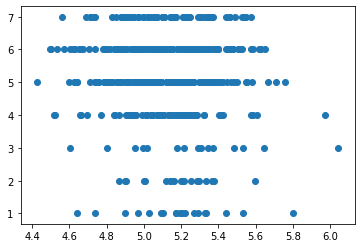

In [285]:
plt.scatter(y_pred_test,y_test)

In [294]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transformer
poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(df_stand)

# Split training and test set
x_train, x_test, y_train, y_test = train_test_split(df_poly, y_regr, test_size=0.2, random_state=1)

# Fitting the model
lr.fit(x_train, y_train)

# Model evaluation
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
print(f'MSE Test: {mse_test:.2f}')
r2 = r2_score(y_test, y_pred_test)
print(f'Coefficient of determination: {r2:.2f}')

MSE Test: 2.26
Coefficient of determination: -0.06


In [311]:
# Ridge regression
from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(df_stand, y_regr, test_size=0.2, random_state=1)

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

# Model evaluation
y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
print(f'MSE Test: {mse_test:.2f}')
r2 = r2_score(y_test, y_pred_test)
print(f'Coefficient of determination: {r2:.2f}')

MSE Test: 2.26
Coefficient of determination: -0.06


----

In [312]:
# Variable selection

In [344]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(df_stand)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [346]:
# pca.__dict__

In [363]:
print('pca components shape:', pca.components_.shape)
print('x shape', df_stand.shape)

# I need a design matrix with shape (2500, 5)
handcrafted = np.dot(df_stand, pca.components_.T)
prinComp = pca.transform(df_stand)

print('handcrafted shape:', handcrafted.shape)
print('api shape', prinComp.shape)
abs(pd.DataFrame(handcrafted) - pd.DataFrame(prinComp)) < 1e-5

diff = abs(pd.DataFrame(handcrafted) - pd.DataFrame(prinComp)) < 1e-5
diff = diff.values.reshape((-1))
np.sum(diff) / len(diff)

# THEY ARE THE SAME!!! YAY :)

pca components shape: (5, 58)
x shape (2500, 58)
handcrafted shape: (2500, 5)
api shape (2500, 5)


1.0

In [367]:
# LDA
from sklearn.lda import LDA

x_train, x_test, y_train, y_test = train_test_split(df_stand, y, test_size=0.2, random_state=1)

lda = LDA()
lda.fit(x_test, y_test)

ModuleNotFoundError: No module named 'sklearn.lda'

----

## Linear Regression

### Assumptions
1. **Weak exogeneity** the predictor variables $x$ can be treated as fixed values, rather than not random variables
2. **Linear model** the response variable is a linear combination of the parameters (regression coeffients) and the predictor variables: $$y = mx + q$$
3. **Constant variance** aka **homoscedasticity** different values of the response have the same variance in their errors, regardless of the values of the predictor variables.
4. **Independence of residuals** the errors of the response variables are independent and uncorrelated with each other.
5. **Lack of perfect multicollinearity** there are no variables that are linear combinations of others. The design matrix *X* must have full rank *p*, where *p* is the number of the predictor variables.
6. **Normal distribution of the residuals** As sample sizes increase, the normality assumption for the residuals is not needed. More precisely, if we consider repeated sampling from our population, for large sample sizes, the distribution (across repeated samples) of the ordinary least squares estimates of the regression coefficients follow a normal distribution. As a consequence, for moderate to large sample sizes, non-normality of residuals should not adversely affect the usual inferential procedures. This result is a consequence of an extremely important result in statistics, known as the *central limit theorem*.

### Relaxing the assumptions
1. Dropping it leads to handle *errors-in-variables* models. 
2. Considering transformations of the predictor variables do not break this assumption, since the model will be still linear in the interaction between predictor variables and coefficients ($y = mf(x) + q$). But be careful, since models with such as polynomial regression are often "too powerful", in that they tend to overfit the data. Adding to the model non-linear terms in the coefficients generate *penalized models* like:
    * **ridge regression**, where the sum of squared residuals + $\lambda \beta^2$ is minimized. The new model has a slight bigger bias due to the introduced penalty, but a lower variance than the original. If the train dataset is smaller than the test, this tecnique helps to reduce the overfitting, since attributes less weigth to the training data points.
    
    Another property of ridge regression models is that when you reduce the slope, the model becomes less sensitive to changes in the predictor variables, thus less prone to overfit the data. $\lambda$ regulates this sensitivity to the predictors: when $\lambda = 0$ the formula is the basic OLS, with no penalties on the coefficients; when $\lambda = \inf$ the model fits a set of coeffiecients close to zero, so the model is totally independent from the predictor variables and predicts every values with $0$.
    
    The best value for $\lambda$ is usually found via cross-validation.
    
    * **lasso regression**, where the sum of squared residuals + $\lambda|\beta|$ is minimized. But *lasso is able to set a coefficient at zero*, for the way it is buildt. So can do variable selection as well! It is a little better than ridge regression at reducing the variance in models that contain a lot of predictor variables. 
    
    * **elastic net regression** combines ridge and lasso regression: the regularization term is $\lambda_{1}\beta^2 + \lambda_{2}|\beta|$. It is especially good at dealing with situations with when there are *correlations between parameters*. Lasso tends to pick just one of the correlated terms and eliminate the other, while ridge regression never sets to zero any parameters and shrinks all the parameters from the correlated variables together. So the correlated variables are all in or out of the final model.


3.  In order to check for heterogeneous error variance, or when a pattern of residuals violates model assumptions of homoscedasticity (error is equally variable around the 'best-fitting line' for all points of x), it is prudent to look for a "fanning effect" between residual error and predicted values. 
4. idk
5. Regularization tecniques can help here in case of *n<p*, i.e. less observations than predictor variables.

### How to deal with multicollinearity
If two or more predictor variables are dependant, they should change together accordingly. But the linear model assumes lack of multicollinearity, expecting that changing one variable do not influence the other predictor vars. 
In case of mc, the coefficients lose part of their meaning, since they reflect a change in the response due to a change in *one* predictor variable at a time.

The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable *independently* because the independent variables tend to change in unison.

Models with polynomial or interaction terms could be affected by multicollinearity. In order to fix that, you should **standardize** the independent variables.

Multicollinearity causes the following two basic types of problems:

1. The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become **very sensitive** to small changes in the model.
2. Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might **not be able to trust the p-values** to identify independent variables that are statistically significant.

But you do not always have to fix multicollinearity: the need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

1. The severity of the problems **increases with the degree of the multicollinearity**. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
2. Multicollinearity affects only the *specific independent variables that are correlated*. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. A.k.a. if there is multicollinearity in variables you are not interested in, you should not fix it.
3. Multicollinearity affects the coefficients and p-values, but ***it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics***. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

The last point shall be repeated: if you are only interested in prediction and not in variable selection and/or in undestanding the role of each variable, multicollinearity will not affect:
- the predictions
- the precision of the predictions
- the goodness-of-fit statistics.

### *p-values* of coefficients
The p-value for each independent/predictor variable tests the null hypothesis that the variable has no correlation with the dependent variable. 

### F Value in Regression
The F value in regression is the result of a test where the null hypothesis is that **all of the regression coefficients are equal to zero**. In other words, the model has no predictive capability. Basically, the f-test compares your model with zero predictor variables (the intercept only model), and decides whether your added coefficients improved the model. If you get a significant result, then whatever coefficients you included in your model improved the model’s fit.

**Read your p-value first**. If the p-value is small (less than your alpha level), you can reject the null hypothesis. Only then should you consider the f-value. If you don’t reject the null, ignore the f-value.

Many authors recommend *ignoring the p-values for individual regression coefficients if the overall F ratio is not statistically significant*. This is because of the multiple testing problem. In other words, your p-value and f-value should both be statistically significant in order to correctly interpret the results.

### Validating model assumptions
1. **Residual analysis**
    * **normality distribution of residuals** shapiro wilk test, goodness of fit, 
    * **heteroscedasticity** inspection of the residuals plot to check "fan" or "bowtie" effects,

2. **Lack of perfect multicollinearity** VIF (variance inflation test), scatteplot to check correlation between variables

### Goodness-of-fit

#### $R^2$ - coefficient of determination

The proportion of the variance in the response variable that is predictable from the predictor variable(s).

*How much variance of the response is explained by the predictor variables.*
$$R^2 = \frac{SS_{Regr}}{SS_{Tot}} = 1 - \frac{SS_{Res}}{SS_{Tot}}$$
Where
- $SS_{Regr} = \sum_{i=1}^{n}(\hat{y}_{i} - \bar{y})^2$
- $SS_{Res} = \sum_{i=1}^{n}(\hat{y}_{i} - y_{i})^2$
- $SS_{Tot} = SS_{Regr} + SS_{Res} = \sum_{i=1}^{n}({y}_{i} - \bar{y})^2$

#### Adjusted $R^2$
The use of an adjusted $R^2$ is an attempt to account for the phenomenon of the $R^2$ automatically and spuriously increasing when extra explanatory variables are added to the model. The adjusted $R^2$ is defined as

$${\bar {R}}^{2}=1-(1-R^{2}){n-1 \over n-p-1}$$
where $p$ is the total number of explanatory variables in the model (not including the constant term), and $n$ is the sample size. 

The adjusted $R^2$ **can be negative**, and its value will **always be less than or equal to that of $R^2$**. Unlike $R^2$, the adjusted $R^2$ increases only when the increase in $R^2$ (due to the inclusion of a new explanatory variable) is more than one would expect to see by chance. 

Adjusted $R^2$ can be interpreted as an unbiased (or less biased) estimator of the population $R^2$, whereas the observed sample $R^2$ is a positively biased estimate of the population value. Adjusted $R^2$ is more appropriate when evaluating model fit (the variance in the dependent variable accounted for by the independent variables) and in comparing alternative models in the feature selection stage of model building.

### Slope and intercept
###### Interpretation of the slope
I represents the *mean change* in the response variable for each 1 unit change in one of the independent variable, holding all other variables constant. 

###### Interpretation of the intercept
Tells the response variable's value whene the independent variable is zero

---
## Dimensionality Reduction

**Dimensionality reduction** or **dimension reduction** is the process of *reducing the number of random variables under consideration* by obtaining a set of principal variables. Approaches can be divided into feature selection and feature extraction.

#### PCA - Principal Components Analysis
The main linear technique for dimensionality reduction, principal component analysis, performs a **linear mapping of the data to a lower-dimensional space** in such a way that the variance of the data in the low-dimensional representation is maximized.

In practice, the covariance (and sometimes the correlation) matrix of the data is constructed and the eigenvectors on this matrix are computed. The eigenvectors that correspond to the largest eigenvalues (the principal components) can now be used to reconstruct a large fraction of the variance of the original data. 

**The variance explained by each eigenvector is the relative eigevalue**. (WOW)

Moreover, the first few eigenvectors can often be interpreted in terms of the large-scale physical behavior of the system, because they often contribute the vast majority of the system's energy, especially in low-dimensional systems. 

The original space (with dimension of the number of points) has been reduced (with data loss, but hopefully retaining the most important variance) to the space spanned by a few eigenvectors.

#### LDA - Linear Discriminant Analysis
Linear discriminant analysis (LDA) is a method used to **find a linear combination of features that characterizes or separates two or more classes of objects or events**.


LDA is closely related to principal component analysis (PCA) and factor analysis in that they both look for linear combinations of variables which best explain the data.

LDA explicitly attempts to model the difference between the classes of data. PCA, in contrast, does not take into account any difference in class, and factor analysis builds the feature combinations based on differences rather than similarities. 

Discriminant analysis is also different from factor analysis in that it is not an interdependence technique: a distinction between independent variables and dependent variables (also called criterion variables) must be made.

#### Covariance Matrix
In probability theory and statistics, a **covariance matrix** (also known as auto-covariance matrix, dispersion matrix, variance matrix, or variance–covariance matrix) is a square matrix giving the covariance between each pair of elements of a given random vector. In the matrix diagonal there are variances, i.e., the covariance of each element with itself.

#### Correlation Matrix
The correlation matrix of $n$ random variables $X_{1},\ldots ,X_{n}$ is the $n\times n$ matrix whose $(i,j)$ entry is $\operatorname {corr} (X_{i},X_{j})$.

Equivalently, the correlation matrix can be seen as the covariance matrix of the standardized random variables $X_{i}/\sigma (X_{i})$ for $i=1,\dots ,n$.

#### Advantages of dimensionality reduction

1. It reduces the time and storage space required.
2. Removal of multi-collinearity improves the interpretation of the parameters of the machine learning model.
3. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.
4. It avoids the curse of dimensionality.

### References
1. Multicollinearity https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
2. Residual plots in yellowbrick scikit-yb.org/en/latest/api/regressor/residuals.html
3. $R^2$ in scikit-learn https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
4. Regression, ANOVA & hypothesis testing http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis#:~:text=The%20tests%20are%20used%20to,%2C%20equals%20some%20constant%20value%2C%20.